Exp2023-10-03/2
## Clock mutants phenotypes under short- and long-day light regime



***Motivation***: Clock mutants show different rhythmic properties under different light conditions

Author: Ines Boehm, Tomasz Zieliński

---



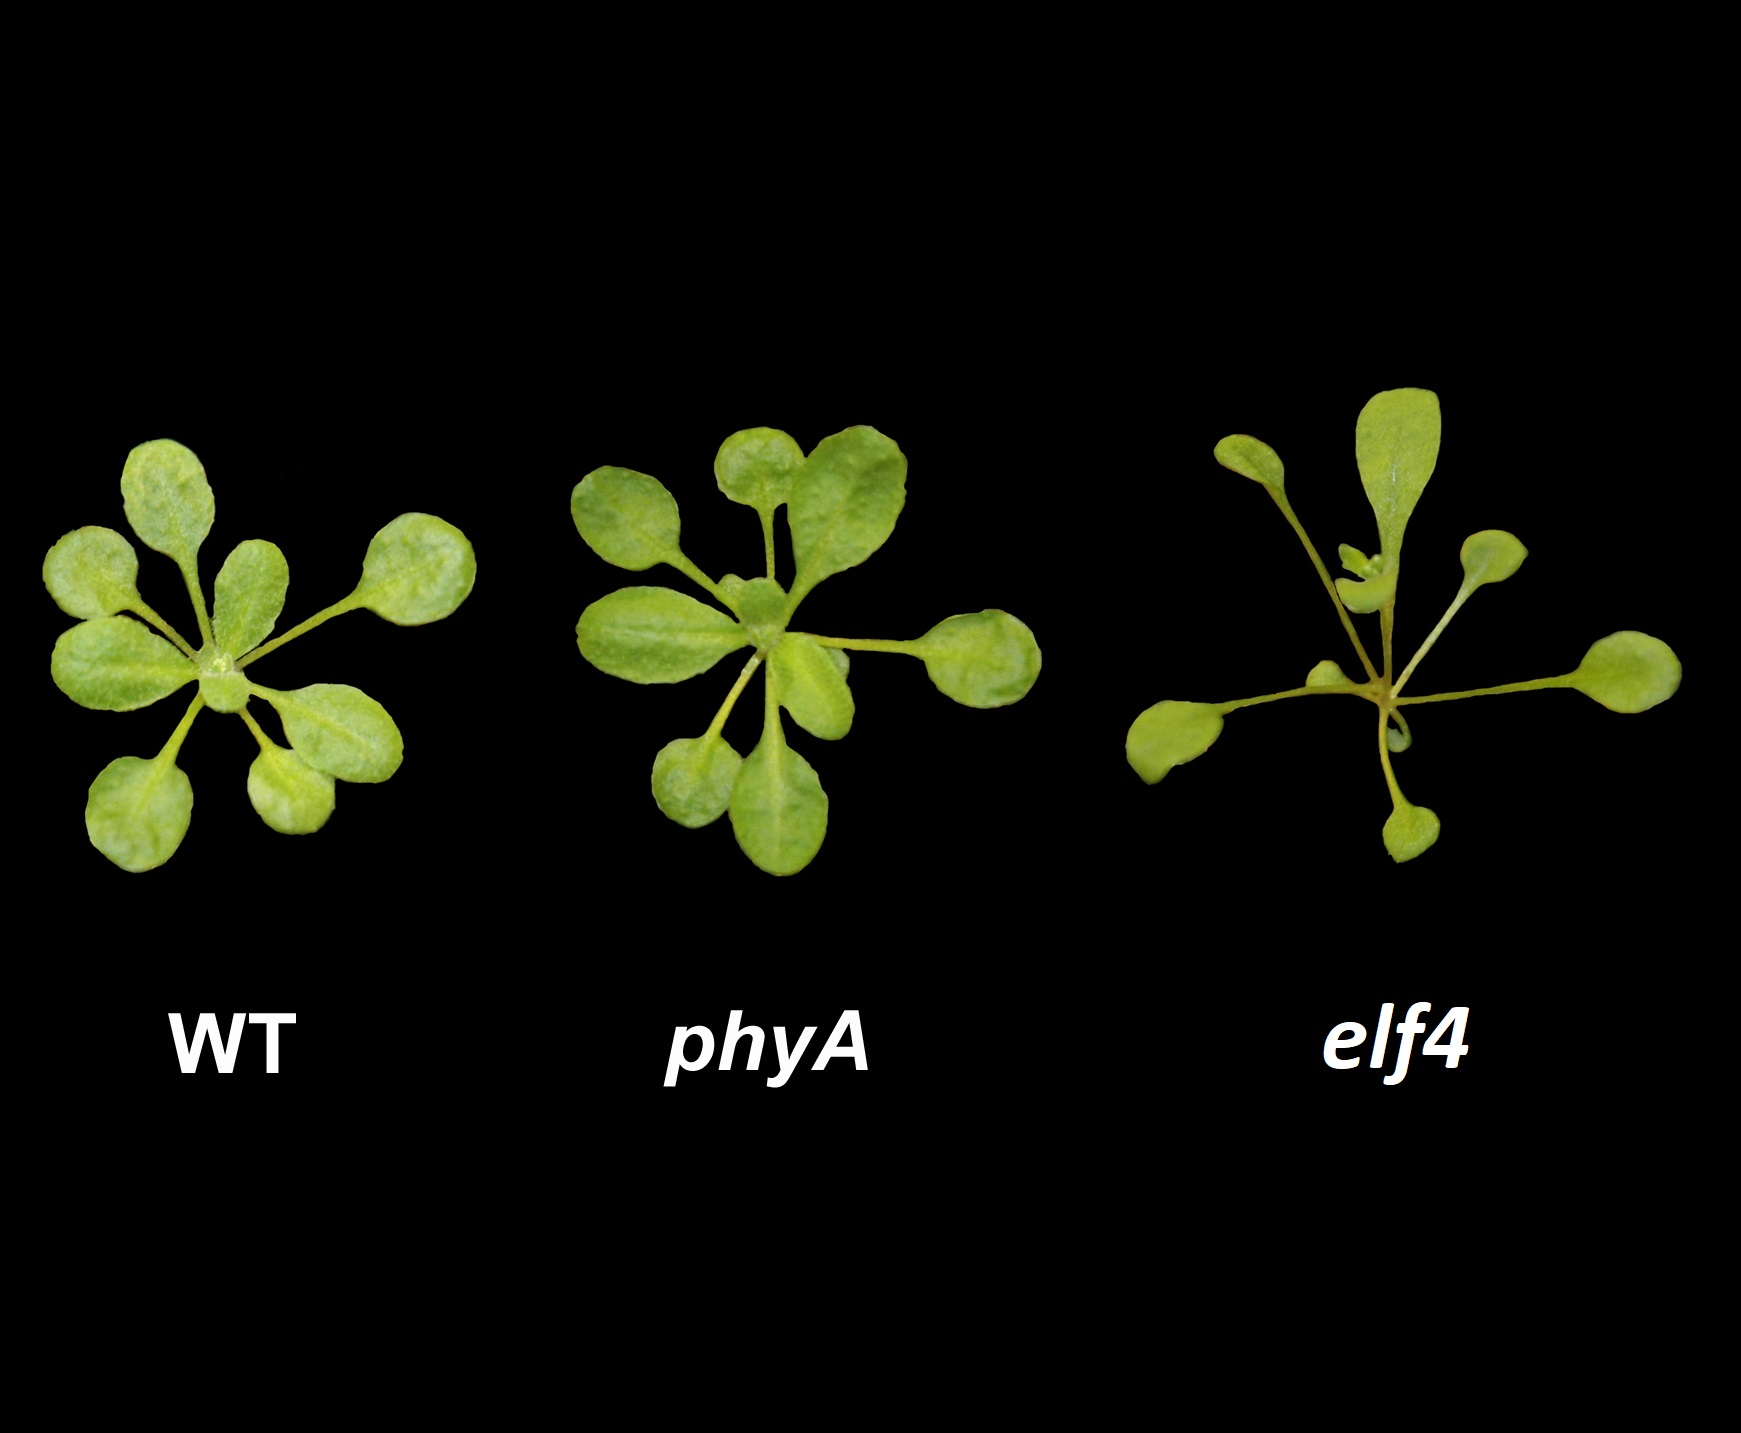

Phenotypes of 3-week-old plants under short days.

**Experiment details:**  
Growth protocol: https://bio-protocol.org/bio101/e126  
Rhythmic properties : Bioluminescence Assay (https://doi.org/10.1007/978-1-0716-2249-0_27),  
Period analysis with BioDare (https://doi.org/10.1007/978-1-0716-1912-4_2)  
Metabolic protocols: Chlorophyll and starch assay (https://doi.org/10.1038/nprot.2009.12),  
Quantification of starch (https://doi.org/10.1038/nprot.2006.232)  

Study date range: 2019-12-05 to 2020-01-05

Experimental conditions:
* SD = short days 6h light (6:18 LD)
* LD = long days 18h light (18:6 LD)

**Tested genotypes:**
* WT
* prr79
* elf4

**Tested markers:**
* LHY
* PRR5
* TOC1

8 replicates per line


---

> This file is part of the Reusable Analysis 
> lesson within the [FAIR in (circadian) practice](https://biordm.github.io/fair-in-circadian-practice/)

---

In [126]:
#################################################
#                                               #
# Hashtags are not run as code and are used for #
# annotation of code in R (they start comments).#
#################################################

# load required libraries
library(ggplot2)
library(dplyr)





In [140]:
# Getting the data
# read data: periods assesments for each line from a csv file
# the read values are stored as a DataFrame, a tabular form of the data

df <- read.delim(file = "long_days_ppa.csv", stringsAsFactors=TRUE, header = TRUE, sep = ",", dec = ".")

In [141]:
# print the first few raw of the data frame
# our data are stored in a "df" variable

head(df)

Label,GENOTYPE,MARKER,Period,Amplitude,Phase,RAE
WT LHY,WT,LHY,23.35294,0.1328012,3.775684,0.2115346
WT LHY,WT,LHY,24.76095,0.1173984,3.740465,0.2000652
WT LHY,WT,LHY,24.19078,0.1218585,4.355085,0.1731074
WT LHY,WT,LHY,24.55496,0.1338473,4.112910,0.2352341
WT LHY,WT,LHY,25.09713,0.1256890,4.739131,0.1755341
WT LHY,WT,LHY,25.62433,0.1528602,5.478945,0.1588452


**Table 1:** For each geneotype and maker combination, period, phase and amplitude were estimated using luciferase assay and FFT NLLS method 

**Note:**
Each line had 8 biological replicates. Period analysis was conducted using BioDare2 system.

# Visualise data

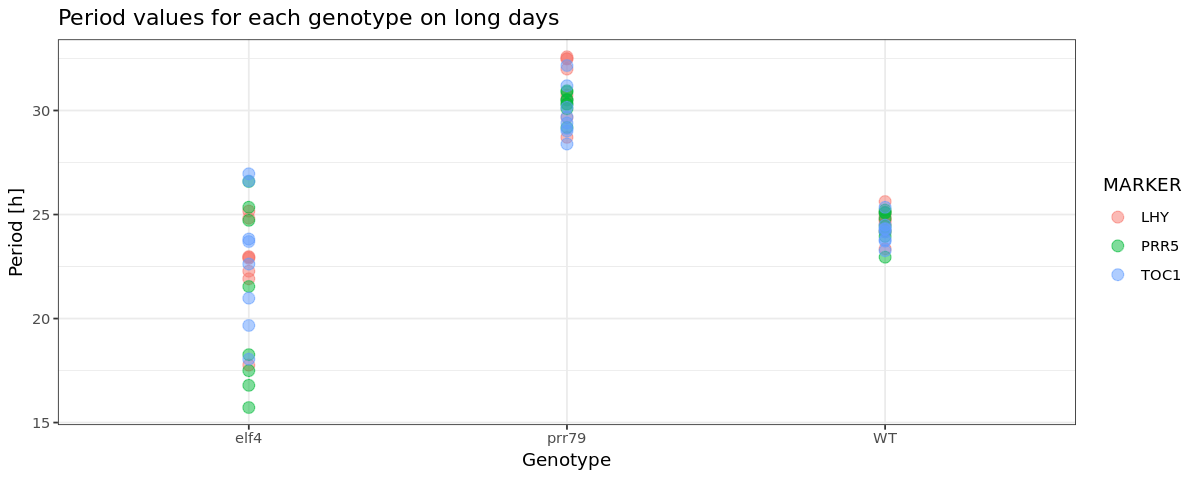

In [158]:
# Plot period values for each line tested

# change size of plot so it fits the screen before plotting
options(repr.plot.width = 10, repr.plot.height = 4)

# ggplot creates plot, first parameter is the underlying data == df
# then we say what should be used as x, y values and how to color the plots
# we color by Label, so each line will have distinct color
# Pay attention to '+' after each command, this is how different parts of plot are assembled togheter

ggplot(df, mapping = aes(x = GENOTYPE, y = Period, fill = MARKER, color = MARKER)) + 
    # creates scatter plot, alternative could be geom_boxplot to make box and whisker plots
    geom_point(size=3, alpha=0.5) +
    # describe the plots, with title and scale labels
    labs(title = "Period values for each genotype on long days",
        x = "Genotype", 
        y = "Period [h]") +
    theme_bw() 

I will use the box plots instead as they are easier to read

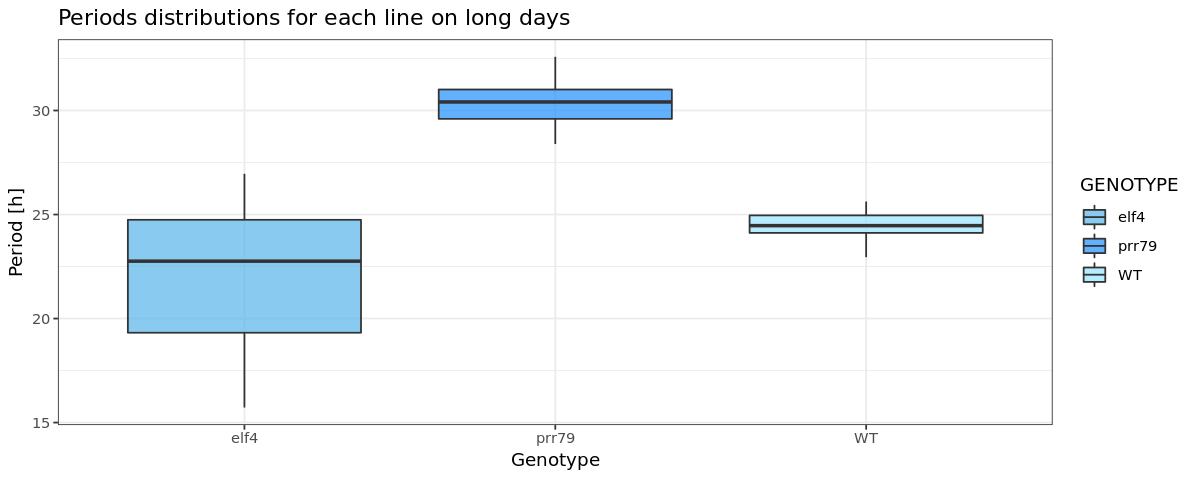

In [171]:
# Plot period distributions for each genotype

# ggplot creates plot, first parameter is the underlying data == df
# then we say what should be used as x, y values and how to color the plots
# we color by Label, so each line will have distinct color
# Pay attention to '+' after each command, this is how different parts of plot are assembled togheter

ggplot(df, mapping = aes(GENOTYPE, y = Period, fill = GENOTYPE)) + 
    # creates box plot
    geom_boxplot(alpha=0.7) +
    # describe the plots, with title and scale labels
    labs(title = "Periods distributions for each genotype on long days",
        x = "Genotype", 
        y = "Period [h]") +
    # setting colors manually    
    scale_fill_manual(values=c("#56B4E9", "dodgerblue", "#98e4fe")) +    
    theme_bw() 

### Period values are different between genotypes

Run anova tests to test it

In [ ]:
# running anova test and storing results for posthoc tests
mod <- aov(Period ~ GENOTYPE, data = df)
summary(mod)

#running post-hoc test which pair of genotypes differ
res <- TukeyHSD(mod)
res

.... add interpretation

#### Phase vs genotype/marker

In [177]:
# Plot phase distributions for each genotype
# Copy paste the code for period graph and adjust the mapping for x variable, plus labels



#### Phase is better visualized on "clock" face.

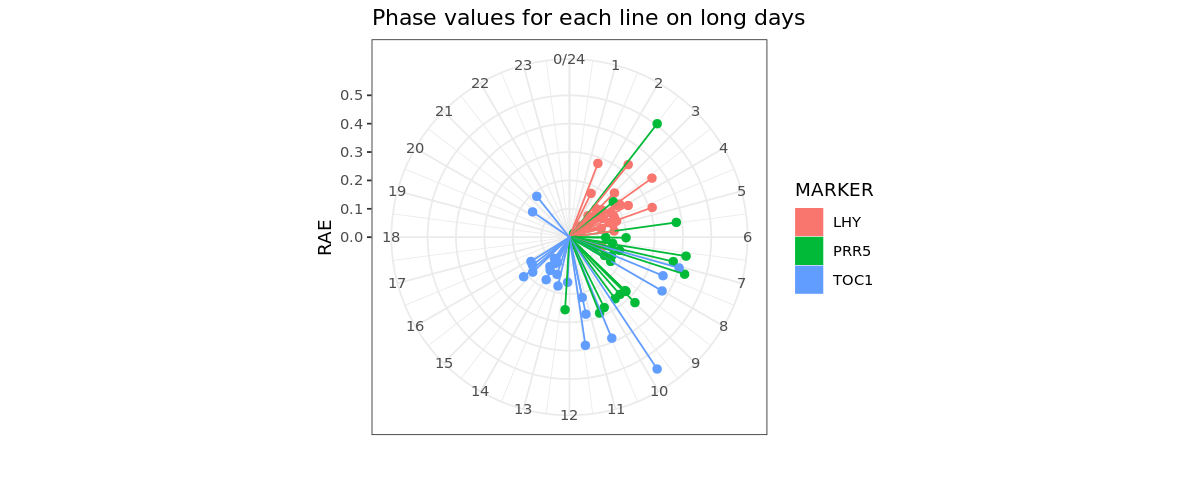

In [180]:

ggplot(df, mapping = aes(x = Phase, y = RAE, fill = MARKER, color = MARKER)) + 
    # creates scatter plot, alternative could be geom_boxplot to make box and whisker plots
    geom_point(size=2) +
    # describe the plots, with title and scale labels
    labs(title = "Phase values for each line on long days",
        x = "Line", y ="RAE" 
        ) +
    # that changes the x to circular one    
    coord_polar()+ 
    # that sets the 24h clock phase
    scale_x_continuous("", breaks = 0:24, limits = c(0, 24))+
    geom_bar(stat='identity', aes(color = MARKER, fill= MARKER)) +
    theme_bw() 
    
# FIX the plot so each line has own color

In [132]:
# Testing if prr79 lines have the same underlying period

# limit data to prr79
selection <- subset(df, GENOTYPE %in% "prr79")
mod <- aov(Period ~ Label, data = selection)
summary(mod)

res <- TukeyHSD(mod)
res



            Df Sum Sq Mean Sq F value Pr(>F)
Label        2  6.455   3.228   2.422  0.113
Residuals   21 27.984   1.333               

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Period ~ Label, data = selection)

$Label
                            diff       lwr       upr     p adj
prr79 PRR5-prr79 LHY  -0.8004756 -2.255318 0.6543663 0.3655255
prr79 TOC1-prr79 LHY  -1.2545331 -2.709375 0.2003088 0.0993221
prr79 TOC1-prr79 PRR5 -0.4540575 -1.908899 1.0007845 0.7151156


Anova tests shows tha the marker (gene clock promotor) has no effect on period

I will tests the periods between genotypes.

Lets plot periods per genotype regardless of the line

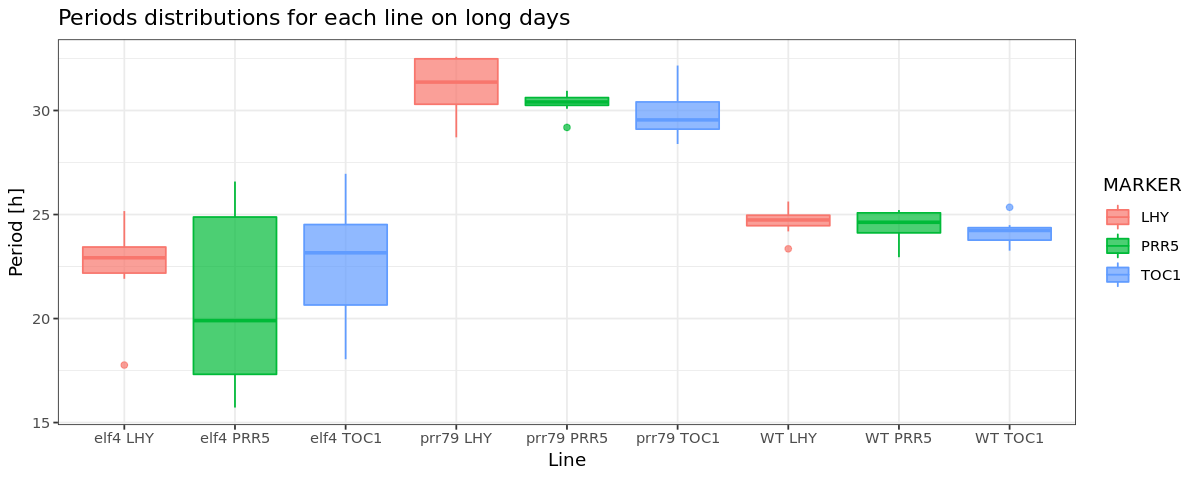

In [133]:
# Plot period distributions for each genotype

# ggplot creates plot, first parameter is the underlying data == df
# then we say what should be used as x, y values and how to color the plots
# we color by Label, so each line will have distinct color
# Pay attention to '+' after each command, this is how different parts of plot are assembled togheter

ggplot(df, mapping = aes(x = Label, y = Period, fill = MARKER, color = MARKER)) + 
    # creates box plot
    geom_boxplot(alpha=0.7) +
    # describe the plots, with title and scale labels
    labs(title = "Periods distributions for each line on long days",
        x = "Line", 
        y = "Period [h]") +
    theme_bw() 

In [134]:
# Lets test if genotypes show different periods


mod <- aov(Period ~ GENOTYPE, data = df)
summary(mod)

res <- TukeyHSD(mod)
res



            Df Sum Sq Mean Sq F value Pr(>F)    
GENOTYPE     2  899.2   449.6   103.8 <2e-16 ***
Residuals   69  299.0     4.3                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Period ~ GENOTYPE, data = df)

$GENOTYPE
                diff        lwr       upr     p adj
prr79-elf4  8.393356  6.9539803  9.832733 0.0000000
WT-elf4     2.362818  0.9234422  3.802195 0.0005738
WT-prr79   -6.030538 -7.4699143 -4.591162 0.0000000


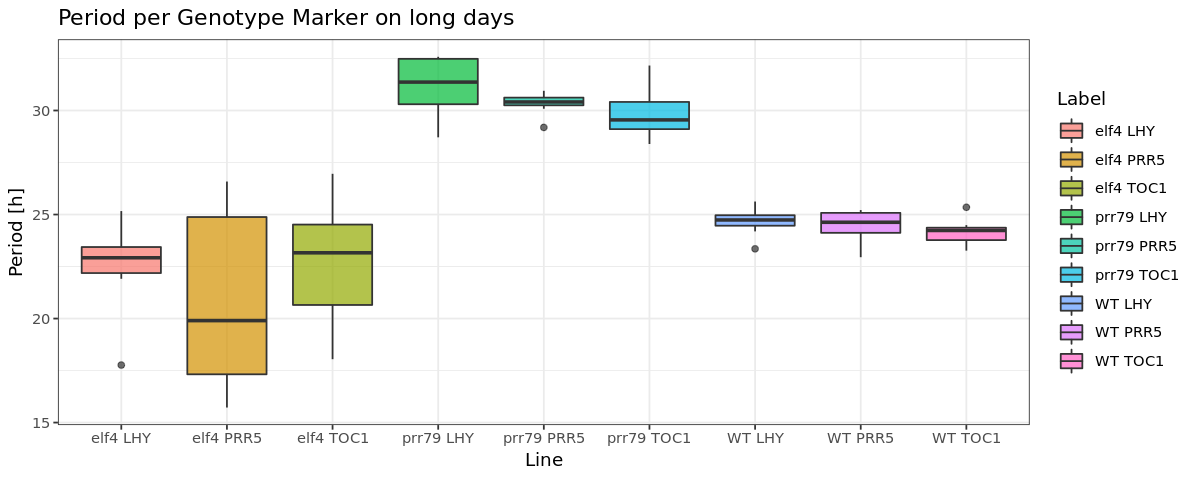

In [135]:


# Create plot for each genotype studied

#df$GENOTYPE <- factor(df$GENOTYPE, levels = c("WT", "prr79","elf4"))
#df$Label <- factor(df$Label, levels = c("WT LHY","WT PRR5", "WT TOC1", "prr79 LHY","prr79 PRR5", "prr79 TOC1", "elf4 LHY","elf4 PRR5", "elf4 TOC1" ))


# change size of plot so it fits the screen before plotting
options(repr.plot.width = 10, repr.plot.height = 4)

# plot your graph
ggplot(df, 
       mapping = aes(x = Label, y = Period, fill = Label)) + # x-axis shows line's Label, y-axis Period, color depends on label 
    geom_boxplot(alpha=0.7) + 
    labs(title = "Period per Genotype Marker on long days",
        x = "Line", # Title of x-axis
        y = "Period [h]") + # Title of y-axis 
    #scale_fill_manual(values=c("#999999", "#E69F00", "#56B4E9", "grey","grey10","grey14","blue", "deepskyblue","dodgerblue")) + # change colour of groups
    theme_bw() 


Period values for different markers (ie different driving gene) show similar values. 
WT has a period under 25hours, prr79 has a longer period around 30 and elf4 seems to have a shorter period than WT but it has big variance between biological replicates.

Running tests if indeed marker has no effect on period.

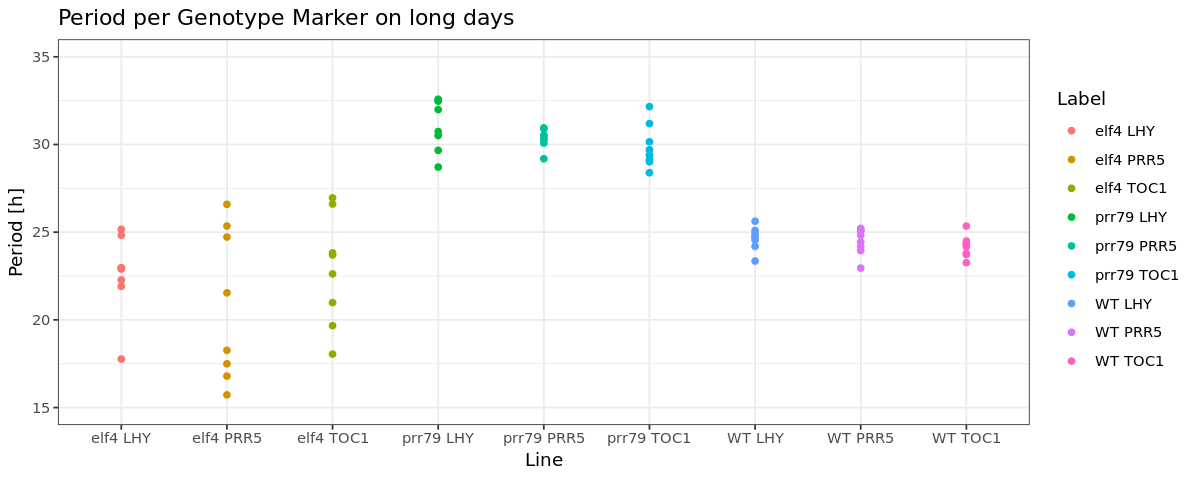

In [136]:
# plot your graph
ggplot(df, 
       mapping = aes(x = Label, y = Period, fill = Label, color = Label)) + # x-axis shows line's Label, y-axis Period, color depends on label 
    geom_point() +
    labs(title = "Period per Genotype Marker on long days",
        x = "Line", # Title of x-axis
        y = "Period [h]") + # Title of y-axis 
    #scale_fill_manual(values=c("#999999", "#E69F00", "#56B4E9", "grey","grey10","grey14","blue", "deepskyblue","dodgerblue")) + # change colour of groups
    ylim(15,35)+
    theme_bw() 


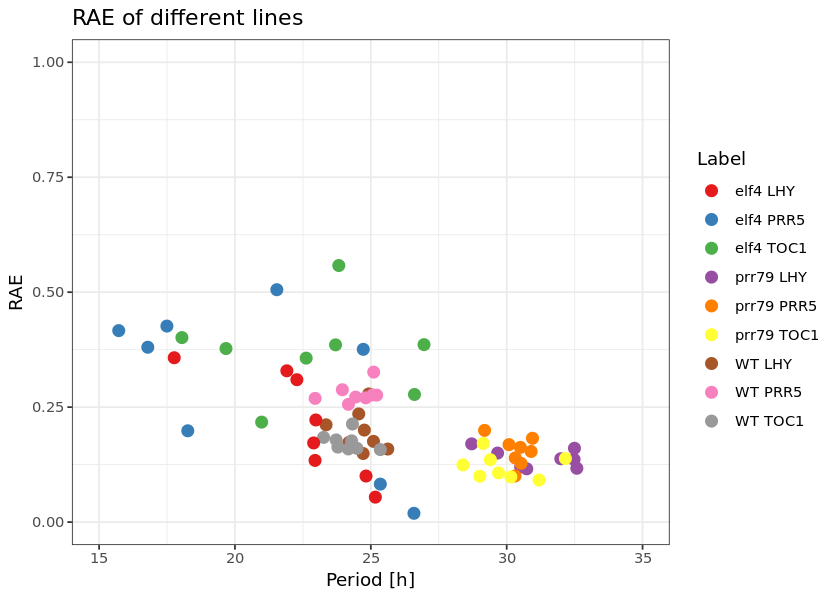

In [181]:
# plot your graph

options(repr.plot.width = 7, repr.plot.height = 5)
ggplot(df, 
       mapping = aes(x = Period, y = RAE, fill = Label, color = Label)) + # x-axis shows line's Label, y-axis Period, color depends on label 
    geom_point(size = 3) +
    labs(title = "RAE of different lines",
        x = "Period [h]", # Title of x-axis
        y = "RAE") + # Title of y-axis 
    scale_colour_brewer(palette = "Set1") +
    xlim(15, 35) +
    ylim(0, 1) +
    theme_bw() 

In [138]:
library(dplyr)
library(broom)

res <- aov(Period ~ Label, data = subset(df, GENOTYPE %in% "WT"))
summary(res)
res <- TukeyHSD(res)
res

res <- aov(Period ~ Label, data = subset(df, GENOTYPE %in% "prr79"))
summary(res)
res <- TukeyHSD(res)
res

res <- aov(Period ~ Label, data = subset(df, GENOTYPE %in% "elf4"))
d <-summary(res)
d
typeof(d)
head(d)
typeof(d[1])
d[1][1]
#res <- TukeyHSD(res)
#res
           


            Df Sum Sq Mean Sq F value Pr(>F)
Label        2  0.926  0.4628   0.977  0.393
Residuals   21  9.949  0.4738               

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Period ~ Label, data = subset(df, GENOTYPE %in% "WT"))

$Label
                      diff       lwr       upr     p adj
WT PRR5-WT LHY  -0.1867783 -1.054258 0.6807009 0.8512629
WT TOC1-WT LHY  -0.4773123 -1.344792 0.3901670 0.3655075
WT TOC1-WT PRR5 -0.2905340 -1.158013 0.5769453 0.6803602


            Df Sum Sq Mean Sq F value Pr(>F)
Label        2  6.455   3.228   2.422  0.113
Residuals   21 27.984   1.333               

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Period ~ Label, data = subset(df, GENOTYPE %in% "prr79"))

$Label
                            diff       lwr       upr     p adj
prr79 PRR5-prr79 LHY  -0.8004756 -2.255318 0.6543663 0.3655255
prr79 TOC1-prr79 LHY  -1.2545331 -2.709375 0.2003088 0.0993221
prr79 TOC1-prr79 PRR5 -0.4540575 -1.908899 1.0007845 0.7151156


            Df Sum Sq Mean Sq F value Pr(>F)
Label        2   19.2   9.599    0.86  0.438
Residuals   21  234.5  11.166               

[1] "list"

            Df Sum Sq Mean Sq F value Pr(>F)
Label        2   19.2   9.599    0.86  0.438
Residuals   21  234.5  11.166               

[1] "list"

            Df Sum Sq Mean Sq F value Pr(>F)
Label        2   19.2   9.599    0.86  0.438
Residuals   21  234.5  11.166               

In [139]:
library(dplyr)
library(broom)

res <- aov(Period ~ Label, data = df)

tmp <- summary(res)
tmp

res <- TukeyHSD(res)
res

res <- res$Label
res



res <- as_tibble(res, rownames = "groups")  %>%
 rename(c("p.adj" = "p adj")) %>%
 filter(p.adj > 0.01) %>%
 arrange(groups)
#head()
res

            Df Sum Sq Mean Sq F value Pr(>F)    
Label        8  925.8  115.72   26.76 <2e-16 ***
Residuals   63  272.4    4.32                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Period ~ Label, data = df)

$Label
                            diff          lwr       upr     p adj
elf4 PRR5-elf4 LHY    -1.7860333  -5.12559504  1.553528 0.7334453
elf4 TOC1-elf4 LHY     0.2056948  -3.13386689  3.545257 0.9999999
prr79 LHY-elf4 LHY     8.5515799   5.21201819 11.891142 0.0000000
prr79 PRR5-elf4 LHY    7.7511043   4.41154257 11.090666 0.0000000
prr79 TOC1-elf4 LHY    7.2970468   3.95748507 10.636608 0.0000001
WT LHY-elf4 LHY        2.0574024  -1.28215929  5.396964 0.5634007
WT PRR5-elf4 LHY       1.8706241  -1.46893763  5.210186 0.6824670
WT TOC1-elf4 LHY       1.5800901  -1.75947158  4.919652 0.8420560
elf4 TOC1-elf4 PRR5    1.9917281  -1.34783356  5.331290 0.6058004
prr79 LHY-elf4 PRR5   10.3376132   6.99805153 13.677175 0.0000000
prr79 PRR5-elf4 PRR5   9.5371376   6.19757590 12.876699 0.0000000
prr79 TOC1-elf4 PRR5   9.0830801   5.74351840 12.422642 0.0000000
WT LHY-elf4 

,diff,lwr,upr,p adj
elf4 PRR5-elf4 LHY,-1.7860333,-5.12559504,1.553528,7.334453e-01
elf4 TOC1-elf4 LHY,0.2056948,-3.13386689,3.545257,9.999999e-01
prr79 LHY-elf4 LHY,8.5515799,5.21201819,11.891142,5.303583e-10
prr79 PRR5-elf4 LHY,7.7511043,4.41154257,11.090666,1.139971e-08
prr79 TOC1-elf4 LHY,7.2970468,3.95748507,10.636608,6.565683e-08
WT LHY-elf4 LHY,2.0574024,-1.28215929,5.396964,5.634007e-01
WT PRR5-elf4 LHY,1.8706241,-1.46893763,5.210186,6.824670e-01
WT TOC1-elf4 LHY,1.5800901,-1.75947158,4.919652,8.420560e-01
elf4 TOC1-elf4 PRR5,1.9917281,-1.34783356,5.331290,6.058004e-01
prr79 LHY-elf4 PRR5,10.3376132,6.99805153,13.677175,1.596046e-11


ERROR: All arguments must be named

In [ ]:
# Create plot for each genotype studied



# change size of plot so it fits the screen before plotting
options(repr.plot.width = 10, repr.plot.height = 4)

# plot your graph
ggplot(df, 
       mapping = aes(x = GENOTYPE, y = Period, fill = GENOTYPE)) + # x-axis shows line label, y-axis Period, fill by marker 
    geom_boxplot(alpha=0.3) +
    labs(title = "Period per Genotype on long days",
        x = "Genotype", # Title of x-axis
        y = "Period [h]") + # Title of y-axis
    scale_fill_manual(values=c("#999999", "#E69F00", "#56B4E9")) + # change colour of groups
    theme_bw() 

In [ ]:
# Create plot for each genotype studied

# first change order of factors of the genotype table
# ggplots standard setting is set to alphabetical order so your plot would read elf, phyA, WT
# If you rerun the code with a hashtag in front of the line you can look
# at the difference in the plot!
df$genotype <- factor(df$genotype, levels = c("WT", "prr79","elf4"))

# change size of plot so it fits the screen before plotting
options(repr.plot.width = 5, repr.plot.height = 4)

# plot your graph
ggplot(subset(df, light_condition %in% "SD"), # subset only SD from light condition column for plotting
       mapping = aes(x = genotype, y = biomas, fill = genotype)) + # x-axis shows genotype, y-axis shows biomas
    geom_boxplot(alpha=0.3) +
    labs(title = "Biomas per Genotype on short days",
        x = "Genotype", # Title of x-axis
        y = "Biomas (g)") + # Title of y-axis
    scale_fill_manual(values=c("#999999", "#E69F00", "#56B4E9")) + # change colour of groups
    theme_bw() +
    theme(legend.position="none")

# ggsave: save the last ggplot
ggsave("genotype_by_biomas.png")

**Figure 1** Biomas (g) per genotype on short days shows a much larger biomas production in PhyA-211 in comparison to wild-type. Elf4-101 has a marginally smaller biomas production than wild-type during short days.

To quantify this we have explored our data and run a ONE-way ANOVA plus Tukey multiple pairwise test.

# Statistical testing

In [ ]:
# Run a one way anova - compute the variance of biomas between genotypes
# ONLY from data within short-day light condition
res.aov <- aov(biomas ~ genotype, data = subset(df, light_condition %in% "SD"))

In [ ]:
# Summary of the analysis
summary(res.aov)

**NOTE** The output includes the columns F value and Pr(>F) corresponding to the p-value of the test.

Given the above p-value in the summary, we can conclude that there are significant differences between the groups highlighted with (&#42;) in the model summary. To find out which groups differ from each other, we conduct a Tukey post-hoc test to find between which groups these differences lie.

In [ ]:
# conduct Tukey multiple pairwise-comparison
TukeyHSD(res.aov)

**NOTE**  
* diff: difference between means of the two groups
* lwr, upr: the lower and the upper end point of the confidence interval at 95% (default)
* p adj: p-value after adjustment for the multiple comparisons.

**RESULT**  
We can see that PhyA-211 and WT are not statistically different.
Whilst elf4-101 and WT also do not differ statistically, there is a significant difference in biomas between elf4-101 and PhyA-211 (&#42;).